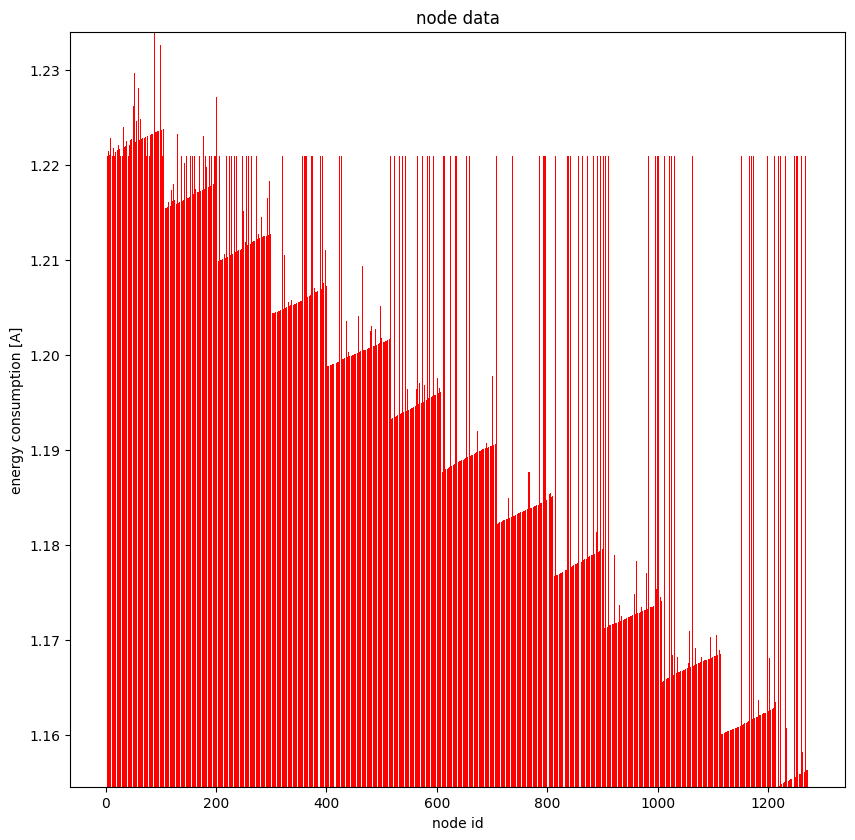

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dataclasses
import copy
import datetime

@dataclasses.dataclass
class NodeData:
    id: int
    pos_x: float
    pos_y: float
    pos_z: float
    activation_time: float
    connection_interval: float
    total_energy_consumption: float
    lora_energy_consumption: float
    ble_energy_consusmption: float


csv_file = "/Users/tozastation/workspace/tozastation/simulate-lorawan/result/first_group_log.csv"
node_datas = []
node_data_csv = pd.read_csv(csv_file)

for index, row in node_data_csv.iterrows():
    node = NodeData(
        int(row[0]), 
        round(float(row[1]), 6),
        round(float(row[2]), 6),
        round(float(row[3]), 6),
        round(float(row[4]), 6),
        round(float(row[5]), 6),
        round(float(row[6]), 6),
        round(float(row[7]), 6),
        round(float(row[8]), 6)
    )
    node_datas.append(node)

fig_e = plt.figure(figsize=(10, 10), dpi=100)
ax_e = fig_e.add_subplot(111)
ax_e.set_title("node data")
ax_e.set_xlabel("node id")
ax_e.set_ylabel("energy consumption [A]")
min:float = node_datas[0].total_energy_consumption
max:float = node_datas[0].total_energy_consumption
for node_data in node_datas:
    if min > node_data.total_energy_consumption: min = node_data.total_energy_consumption
    if max < node_data.total_energy_consumption: max = node_data.total_energy_consumption
ax_e.set_ylim(min, max)

for node_data in node_datas:
    # print(node_data.total_energy_consumption)
    ax_e.bar(node_data.id, node_data.total_energy_consumption, color='r')

file_prefix = datetime.datetime.now().isoformat()
file_name = file_prefix + "_lorawan_energy_consumption.png"
fig_e.savefig("/Users/tozastation/workspace/tozastation/simulate-lorawan/output/" + file_name)

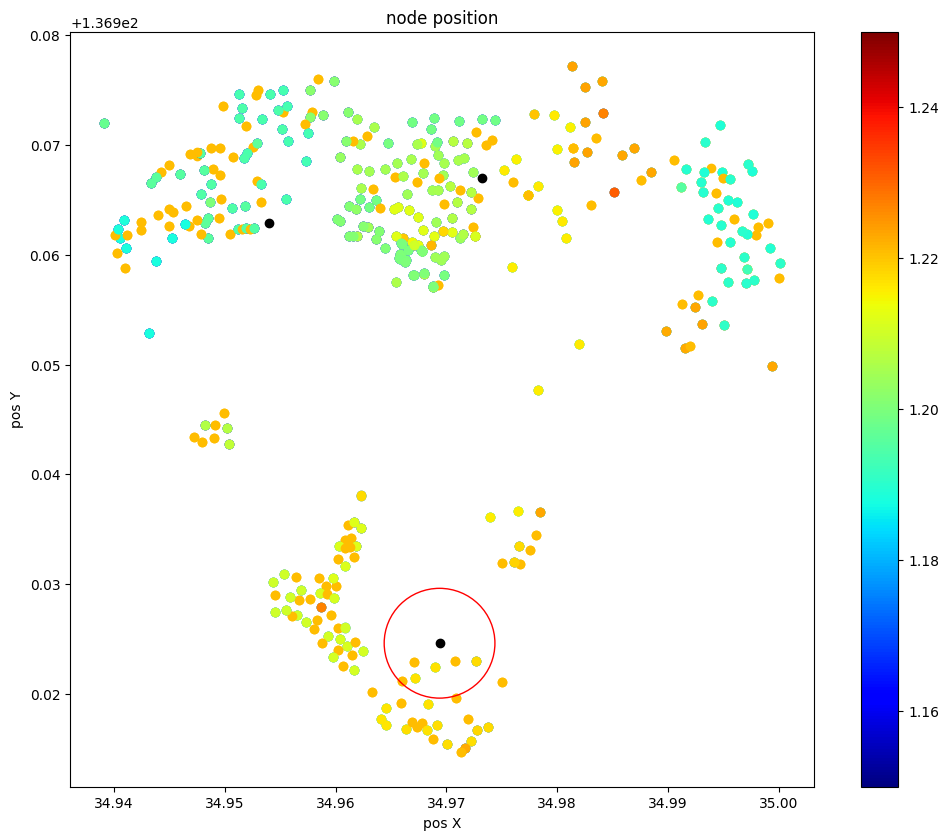

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dataclasses
import copy
import datetime
import matplotlib.patches as patches

@dataclasses.dataclass
class NodeData:
    id: int
    pos_x: float
    pos_y: float
    pos_z: float
    activation_time: float
    connection_interval: float
    total_energy_consumption: float
    lora_energy_consumption: float
    ble_energy_consusmption: float

@dataclasses.dataclass
class LoRaWANGateway:
    latitude: float
    longitude: float
        
csv_file = "/Users/tozastation/workspace/tozastation/simulate-lorawan/result/first_group_log.csv"
node_datas = []
node_data_csv = pd.read_csv(csv_file)

for index, row in node_data_csv.iterrows():
    node = NodeData(
        int(row[0]), 
        round(float(row[1]), 6),
        round(float(row[2]), 6),
        round(float(row[3]), 6),
        round(float(row[4]), 6),
        round(float(row[5]), 6),
        round(float(row[6]), 6),
        round(float(row[7]), 6),
        round(float(row[8]), 6)
    )
    node_datas.append(node)

# ----
fig_p = plt.figure(figsize=(12, 10), dpi=100)
ax_p = fig_p.add_subplot(111)
ax_p.set_title("node position")
ax_p.set_xlabel("pos X")
ax_p.set_ylabel("pos Y")

# plot gateway
gw_a = LoRaWANGateway(34.969392, 136.924615)
gw_b = LoRaWANGateway(34.953981, 136.962864)
gw_c = LoRaWANGateway(34.973183, 136.967018)
ax_p.scatter(gw_a.latitude, gw_a.longitude, color='black')
ax_p.scatter(gw_b.latitude, gw_b.longitude, color='black')
ax_p.scatter(gw_c.latitude, gw_c.longitude, color='black')
gw_a_range = patches.Circle(xy=(gw_a.latitude, gw_a.longitude), radius=0.005, ec='r', fill=False)
ax_p.add_patch(gw_a_range)
# plot node
plot = ""
for node_data in node_datas:
    latitude = node_data.pos_y
    longitude = node_data.pos_x
    plot = ax_p.scatter(latitude, longitude, vmin=1.150, vmax=1.250, c=node_data.total_energy_consumption, cmap='jet')

fig_p.colorbar(plot)
# write file
file_prefix = datetime.datetime.now().isoformat()
file_name = file_prefix + "_lorawan_node_position.png"
fig_p.savefig("/Users/tozastation/workspace/tozastation/simulate-lorawan/output/" + file_name)